In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Dataset Collection and understanding

In [3]:
df = pd.read_csv('online_retail.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2023-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2023-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2023-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2023-12-09 12:50:00,4.15,12680.0,France


In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.shape

(541909, 8)

In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
df['CustomerID'].value_counts()

CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: count, Length: 4372, dtype: int64

In [10]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [11]:
df.duplicated().sum()

5268

In [12]:
print(df['Country'].value_counts())

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [13]:
print(df[(df['Quantity'] <= 0) | (df['UnitPrice'] <= 0)])

       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

                InvoiceDate  UnitPrice  CustomerID         Country  
141     2022-12-01 09:41:00      27.50    

In [14]:
# Data Preprocessing

In [15]:
df.dropna(subset=['CustomerID'], inplace=True)

In [16]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [17]:
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

In [18]:
df.shape

(397924, 8)

In [19]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [20]:
df.shape

(397884, 8)

In [21]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


In [22]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [23]:
#Clustering Methodology

In [24]:
#Feature engineering

In [25]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [26]:
df['InvoiceDate']

0        2022-12-01 08:26:00
1        2022-12-01 08:26:00
2        2022-12-01 08:26:00
3        2022-12-01 08:26:00
4        2022-12-01 08:26:00
                 ...        
541904   2023-12-09 12:50:00
541905   2023-12-09 12:50:00
541906   2023-12-09 12:50:00
541907   2023-12-09 12:50:00
541908   2023-12-09 12:50:00
Name: InvoiceDate, Length: 397884, dtype: datetime64[ns]

In [27]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

In [28]:
df['InvoiceMonth']

0         2022-12
1         2022-12
2         2022-12
3         2022-12
4         2022-12
           ...   
541904    2023-12
541905    2023-12
541906    2023-12
541907    2023-12
541908    2023-12
Name: InvoiceMonth, Length: 397884, dtype: period[M]

In [29]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [30]:
df['TotalPrice']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: TotalPrice, Length: 397884, dtype: float64

In [31]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,2022-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,2022-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,2022-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,2022-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,2022-12,20.34


In [32]:
# Exploratory Data Analysis (EDA)

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

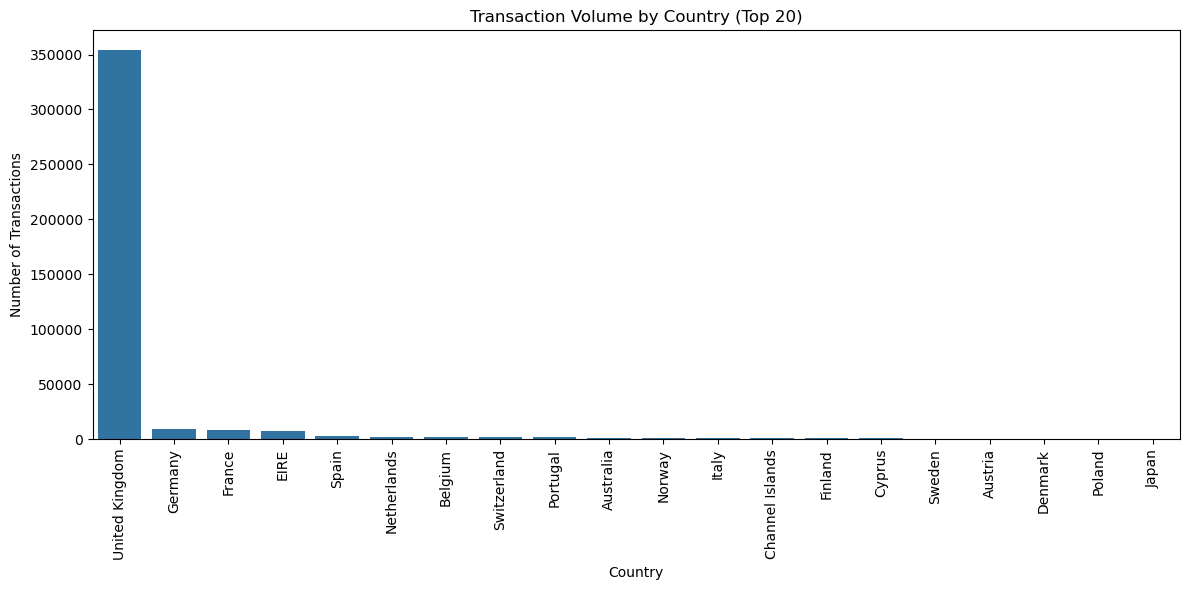

In [34]:
# Analyze transaction volume by country
country_counts = df['Country'].value_counts().head(20) # Top 20 countries

plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.xticks(rotation=90)
plt.title('Transaction Volume by Country (Top 20)')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

In [35]:
# Aggregate sales by StockCode and Description
product_sales = df.groupby(['StockCode', 'Description'])['TotalPrice'].sum().sort_values(ascending=False).reset_index()
top_products = product_sales.head(10)

print("Top 10 Selling Products:")
print(top_products)


Top 10 Selling Products:
  StockCode                         Description  TotalPrice
0     23843         PAPER CRAFT , LITTLE BIRDIE   168469.60
1     22423            REGENCY CAKESTAND 3 TIER   142592.95
2    85123A  WHITE HANGING HEART T-LIGHT HOLDER   100448.15
3    85099B             JUMBO BAG RED RETROSPOT    85220.78
4     23166      MEDIUM CERAMIC TOP STORAGE JAR    81416.73
5      POST                             POSTAGE    77803.96
6     47566                       PARTY BUNTING    68844.33
7     84879       ASSORTED COLOUR BIRD ORNAMENT    56580.34
8         M                              Manual    53779.93
9     23084                  RABBIT NIGHT LIGHT    51346.20


In [36]:
# Visualize purchase trends over time

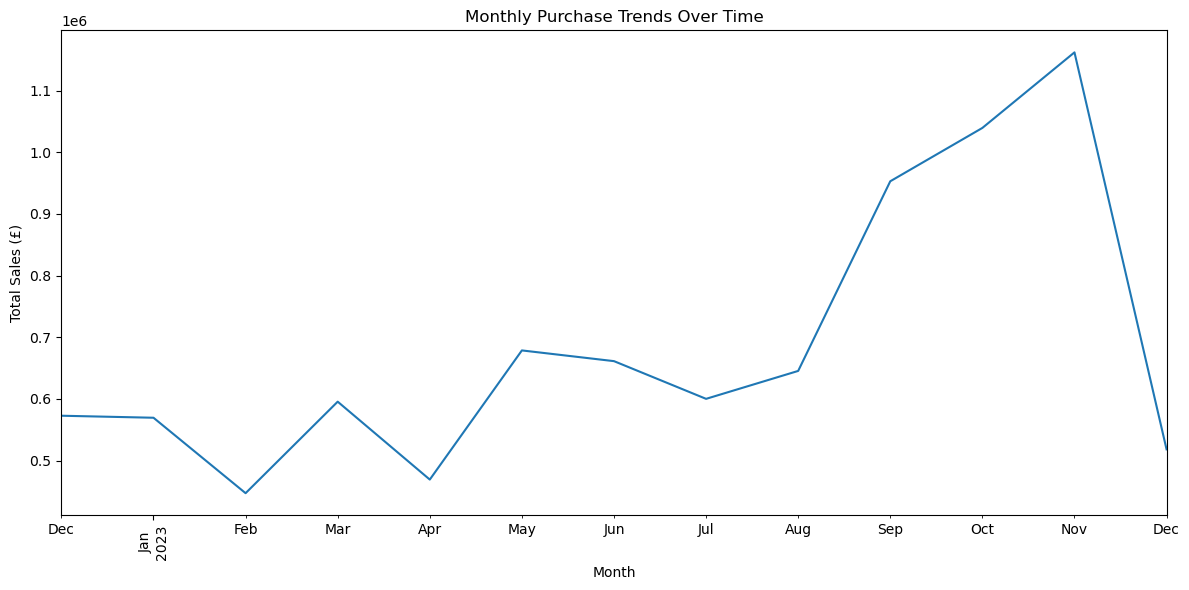

InvoiceMonth
2022-12     572713.890
2023-01     569445.040
2023-02     447137.350
2023-03     595500.760
2023-04     469200.361
2023-05     678594.560
2023-06     661213.690
2023-07     600091.011
2023-08     645343.900
2023-09     952838.382
2023-10    1039318.790
2023-11    1161817.380
2023-12     518192.790
Freq: M, Name: TotalPrice, dtype: float64


In [37]:

monthly_sales = df.groupby('InvoiceMonth')['TotalPrice'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Purchase Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales (£)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
print(monthly_sales)

InvoiceNo
536365    139.12
536366     22.20
536367    278.73
536368     70.05
536369     17.85
           ...  
581583    124.60
581584    140.64
581585    329.05
581586    339.20
581587    249.45
Name: TotalPrice, Length: 18532, dtype: float64


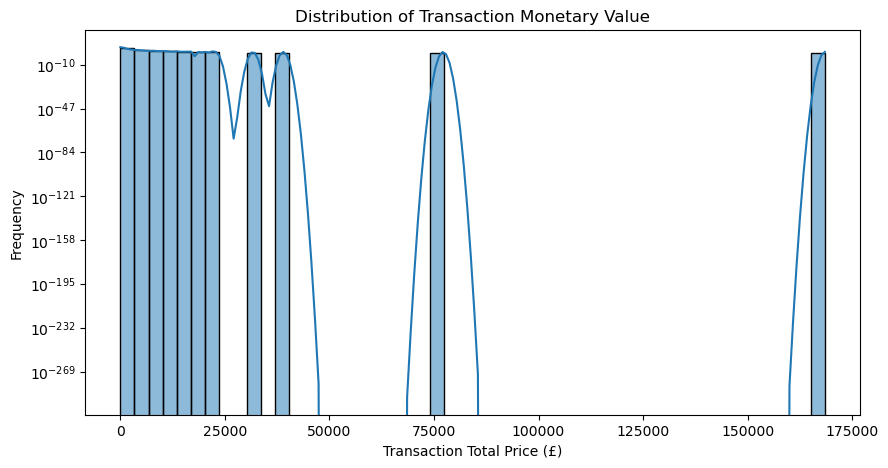

In [38]:
# Monetary distribution per transaction
transaction_monetary = df.groupby('InvoiceNo')['TotalPrice'].sum()
print(transaction_monetary)

plt.figure(figsize=(10, 5))
sns.histplot(transaction_monetary, bins=50, kde=True)
plt.title('Distribution of Transaction Monetary Value')
plt.xlabel('Transaction Total Price (£)')
plt.ylabel('Frequency')
plt.yscale('log') # Use log scale for better visualization of skewed data
plt.show()



CustomerID
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
             ...   
18280.0      180.60
18281.0       80.82
18282.0      178.05
18283.0     2094.88
18287.0     1837.28
Name: TotalPrice, Length: 4338, dtype: float64


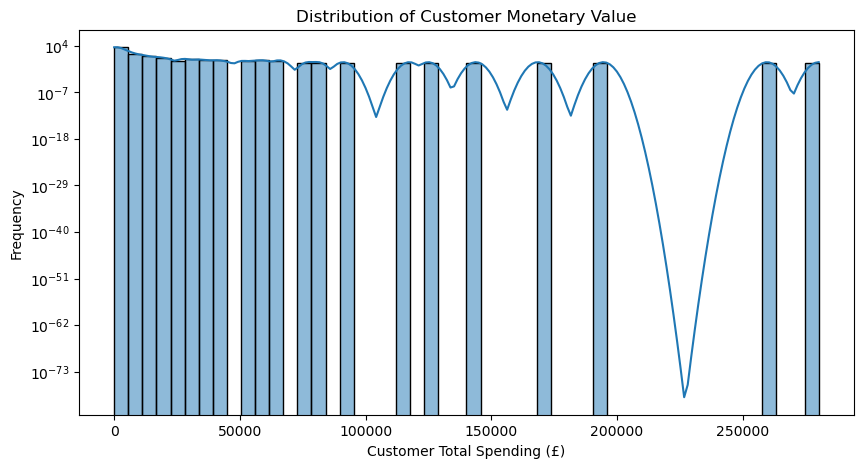

In [39]:

# Monetary distribution per customer
customer_monetary = df.groupby('CustomerID')['TotalPrice'].sum()
print(customer_monetary)
plt.figure(figsize=(10, 5))
sns.histplot(customer_monetary, bins=50, kde=True)
plt.title('Distribution of Customer Monetary Value')
plt.xlabel('Customer Total Spending (£)')
plt.ylabel('Frequency')
plt.yscale('log') # Use log scale
plt.show()


In [40]:
#RFM calculation

In [41]:
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('CustomerID').agg(
    Recency=('InvoiceDate', lambda date: (snapshot_date - date.max()).days),
    Frequency=('InvoiceNo', 'nunique'),
    Monetary=('TotalPrice', 'sum')
).reset_index()

print("\nRFM Data:")
print(rfm.head(12))



RFM Data:
    CustomerID  Recency  Frequency  Monetary
0      12346.0      326          1  77183.60
1      12347.0        2          7   4310.00
2      12348.0       75          4   1797.24
3      12349.0       19          1   1757.55
4      12350.0      310          1    334.40
5      12352.0       36          8   2506.04
6      12353.0      204          1     89.00
7      12354.0      232          1   1079.40
8      12355.0      214          1    459.40
9      12356.0       23          3   2811.43
10     12357.0       33          1   6207.67
11     12358.0        2          2   1168.06


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [43]:
# Standardize the RFM data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

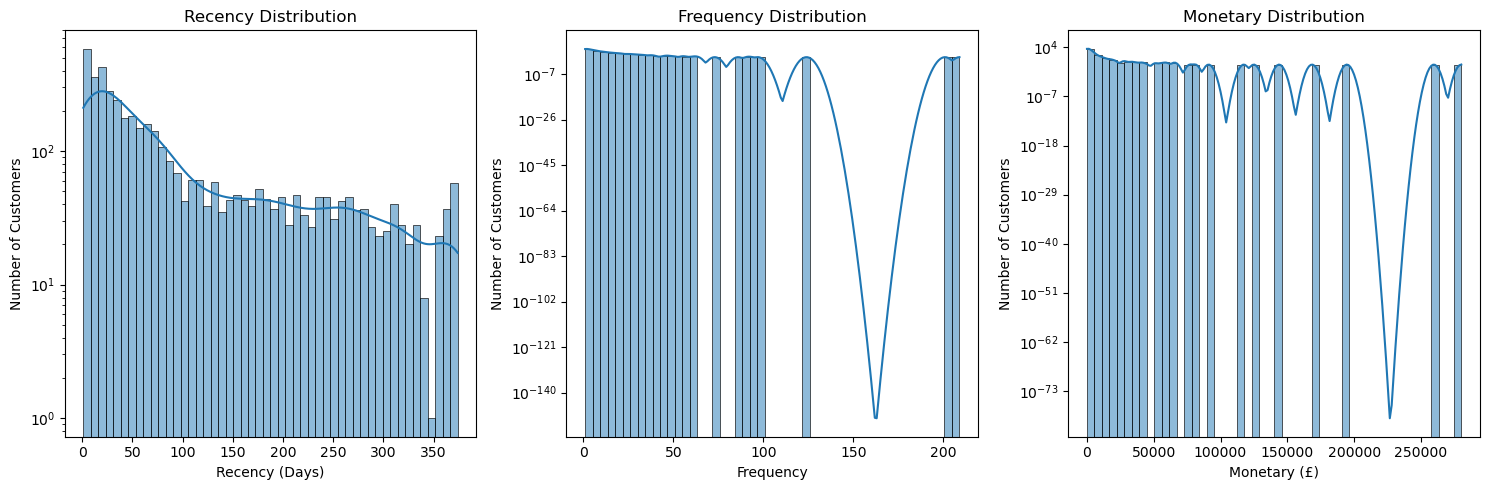

In [44]:
# Plot RFM distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], bins=50, kde=True)
plt.title('Recency Distribution')
plt.xlabel('Recency (Days)')
plt.ylabel('Number of Customers')
plt.yscale('log')

plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], bins=50, kde=True)
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Number of Customers')
plt.yscale('log')

plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary'], bins=50, kde=True)
plt.title('Monetary Distribution')
plt.xlabel('Monetary (£)')
plt.ylabel('Number of Customers')
plt.yscale('log')

plt.tight_layout()
plt.show()


In [45]:
 #Elbow curve for cluster selection (using RFM data)

In [46]:
 #Clustering Algorithm: KMeans>  Elbow Method & Silhouette Score

  File "C:\Users\HP\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\HP\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\HP\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


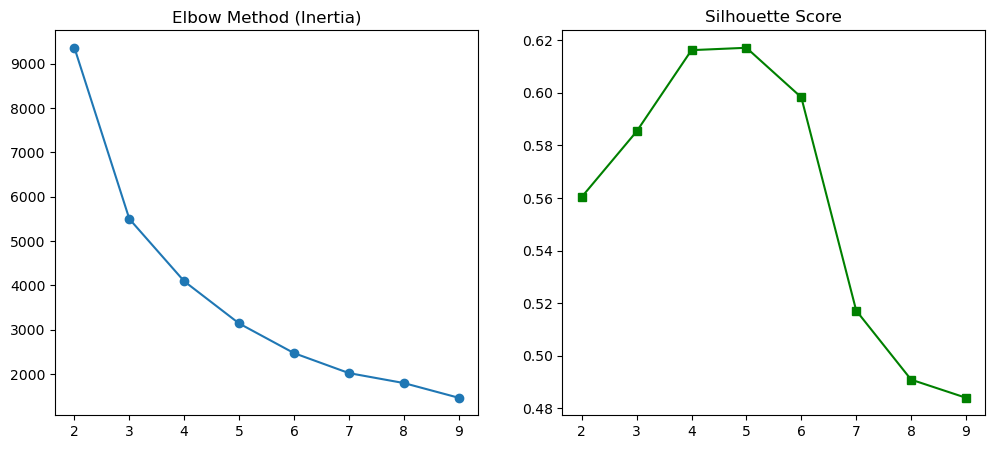

In [47]:
inertia = []
silhouette_scores = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(rfm_scaled, kmeans.labels_))

# Plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method (Inertia)")

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='s', color='green')
plt.title("Silhouette Score")

plt.show()


In [48]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [49]:
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency_Scaled', 'Frequency_Scaled', 'Monetary_Scaled'])
rfm_clustered = pd.concat([rfm, rfm_scaled_df], axis=1)

In [50]:
cluster_profiles = rfm_clustered.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().reset_index()

print("\nCustomer Cluster Profiles:")
print(cluster_profiles)



Customer Cluster Profiles:
   Cluster     Recency  Frequency       Monetary
0        0   43.702685   3.682711    1359.049284
1        1  248.075914   1.552015     480.617480
2        2    7.384615  82.538462  127338.313846
3        3   15.500000  22.333333   12709.090490


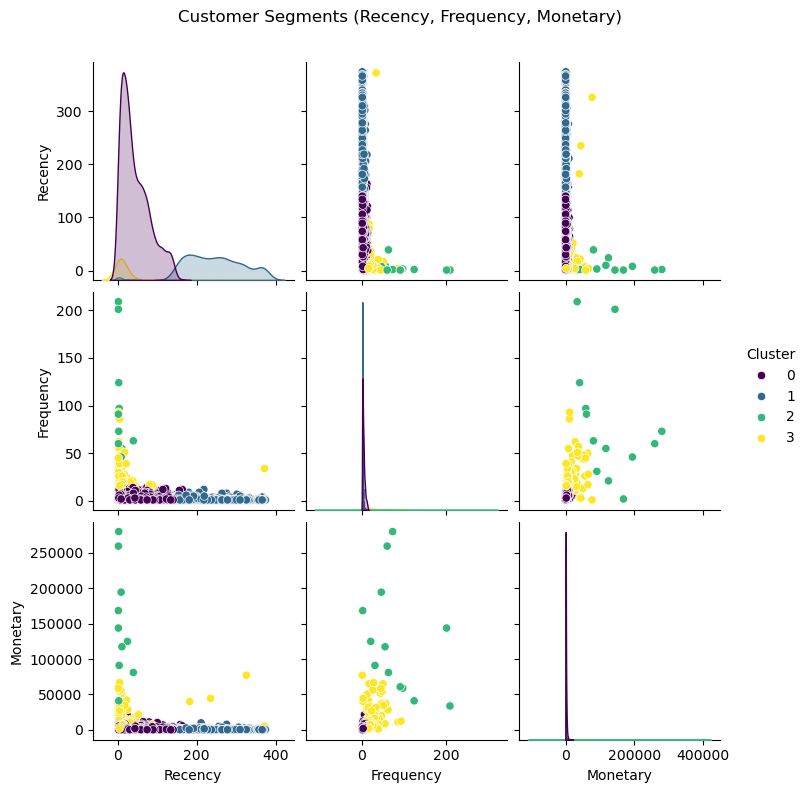

In [75]:
sns.pairplot(rfm, hue='Cluster', vars=['Recency', 'Frequency', 'Monetary'], palette='viridis')
plt.suptitle('Customer Segments (Recency, Frequency, Monetary)', y=1.05)
plt.show()

In [ ]:
#Product recommendation heatmap / similarity matrix

In [51]:
customer_product_matrix = df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', aggfunc='sum').fillna(0)

In [52]:
min_customers_per_product = 50
product_counts = (customer_product_matrix > 0).sum(axis=0)
frequent_products = product_counts[product_counts >= min_customers_per_product].index.tolist()

In [53]:
customer_product_matrix_filtered = customer_product_matrix[frequent_products]

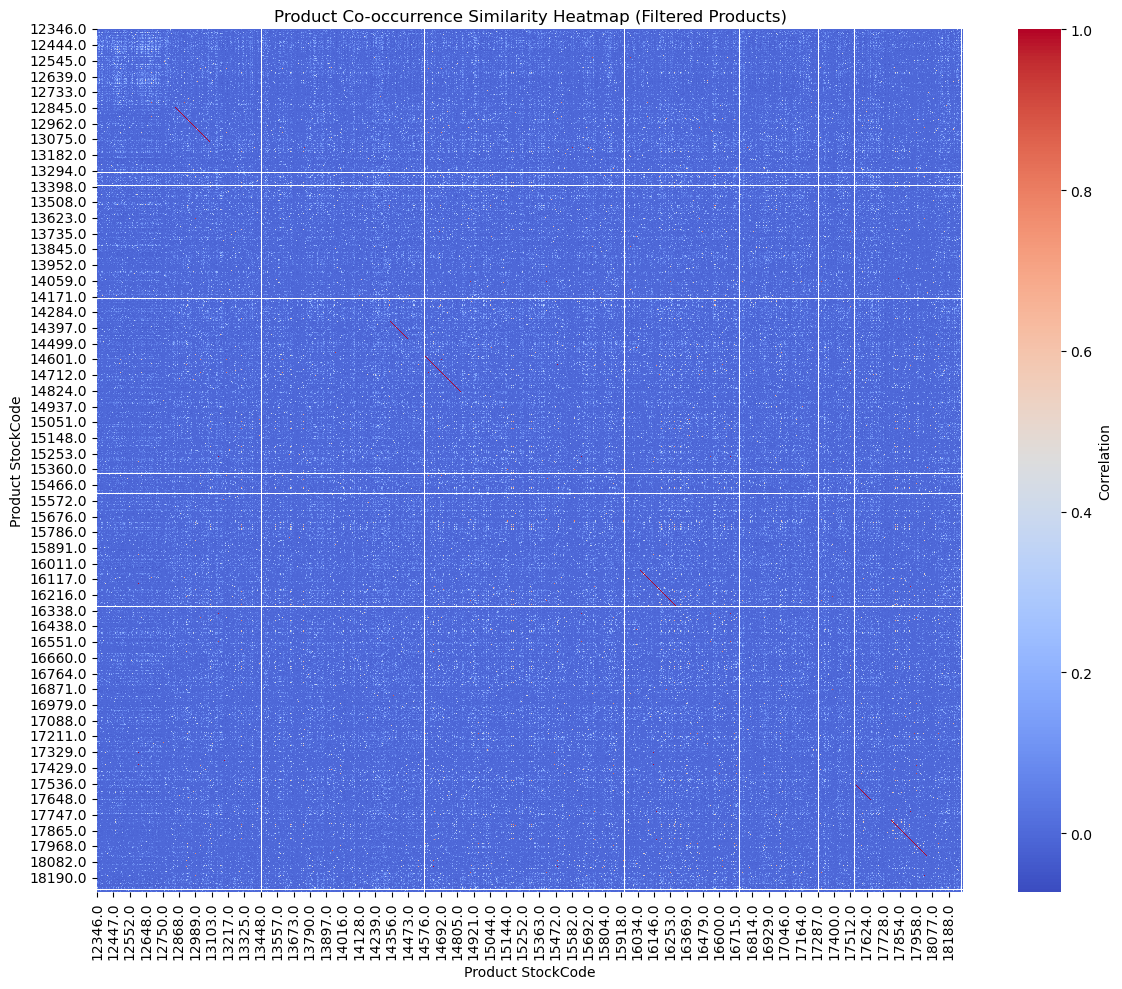

In [54]:

if not customer_product_matrix_filtered.empty and customer_product_matrix_filtered.shape[1] > 1:
    product_similarity_matrix = customer_product_matrix_filtered.T.corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(product_similarity_matrix, cmap='coolwarm', annot=False, fmt=".2f", cbar_kws={'label': 'Correlation'})
    plt.title('Product Co-occurrence Similarity Heatmap (Filtered Products)')
    plt.xlabel('Product StockCode')
    plt.ylabel('Product StockCode')
    plt.tight_layout()
    plt.show()
else:
    print("\nNot enough frequent products to create a meaningful similarity matrix heatmap.")

In [55]:
#Label the Clusters (Based on RFM Averages)

def label_segment(row):
    if row['Recency'] <= rfm['Recency'].quantile(0.25) and row['Frequency'] >= rfm['Frequency'].quantile(0.75) and row['Monetary'] >= rfm['Monetary'].quantile(0.75):
        return "High-Value"
    elif row['Frequency'] >= rfm['Frequency'].quantile(0.5):
        return "Regular"
    elif row['Recency'] >= rfm['Recency'].quantile(0.75):
        return "At-Risk"
    else:
        return "Occasional"

rfm['Segment'] = rfm.apply(label_segment, axis=1)

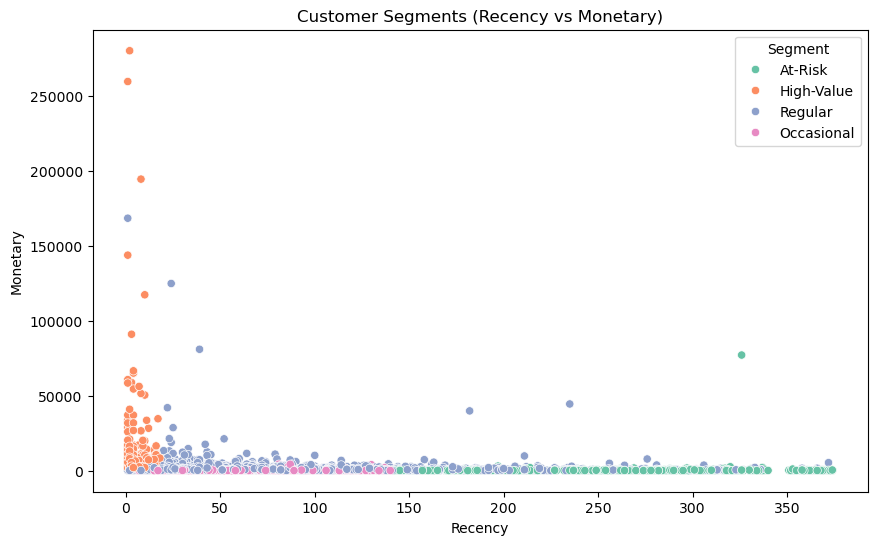

In [56]:

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Segment', palette='Set2')
plt.title("Customer Segments (Recency vs Monetary)")
plt.show()

In [57]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [58]:
import joblib

joblib.dump(kmeans, "rfm_kmeans_model.joblib")
joblib.dump(scaler, "rfm_scaler.joblib")

['rfm_scaler.joblib']

In [59]:
with open ("rfm_kmeans_model.joblib")as file_hand:
    resu_data = joblib.load("rfm_kmeans_model.joblib")
    print(resu_data)

KMeans(n_clusters=4, random_state=42)


In [60]:
with open ("rfm_scaler.joblib")as file_hand:
    resu = joblib.load("rfm_scaler.joblib")
    print(resu)

StandardScaler()


In [61]:
rfm.to_csv("rfm_clustered.csv", index=False)

In [62]:
rfm

,CustomerID,Recency,Frequency,Monetary,Cluster,Segment
0,12346.0,326,1,77183.60,3,At-Risk
1,12347.0,2,7,4310.00,0,High-Value
2,12348.0,75,4,1797.24,0,Regular
3,12349.0,19,1,1757.55,0,Occasional
4,12350.0,310,1,334.40,1,At-Risk
...,...,...,...,...,...,...
4333,18280.0,278,1,180.60,1,At-Risk
4334,18281.0,181,1,80.82,1,At-Risk
4335,18282.0,8,2,178.05,0,Regular
4336,18283.0,4,16,2094.88,3,High-Value


In [63]:
rfm_df = pd.read_csv("rfm_clustered.csv")
rfm_df

,CustomerID,Recency,Frequency,Monetary,Cluster,Segment
0,12346.0,326,1,77183.60,3,At-Risk
1,12347.0,2,7,4310.00,0,High-Value
2,12348.0,75,4,1797.24,0,Regular
3,12349.0,19,1,1757.55,0,Occasional
4,12350.0,310,1,334.40,1,At-Risk
...,...,...,...,...,...,...
4333,18280.0,278,1,180.60,1,At-Risk
4334,18281.0,181,1,80.82,1,At-Risk
4335,18282.0,8,2,178.05,0,Regular
4336,18283.0,4,16,2094.88,3,High-Value


In [64]:

# Recommendation System Approach:
#Use Item-based Collaborative Filtering


In [65]:
# Use cleaned data with CustomerID, StockCode, Quantity
item_matrix = df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', aggfunc='sum', fill_value=0)
print(item_matrix.shape)

(4338, 3665)


In [66]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Transpose to get Item-Item similarity
cosine_sim_matrix = cosine_similarity(item_matrix.T)
similarity_df = pd.DataFrame(cosine_sim_matrix, index=item_matrix.columns, columns=item_matrix.columns)


In [67]:
import joblib
joblib.dump(similarity_df, "product_similarity.joblib")

['product_similarity.joblib']

In [68]:
with open ("product_similarity.joblib")as file_hand:
    resu = joblib.load("product_similarity.joblib")
    print(resu)

StockCode     10002     10080     10120    10123C  10124A    10124G     10125  \
StockCode                                                                       
10002      1.000000  0.000000  0.001548  0.000990     0.0  0.000000  0.853890   
10080      0.000000  1.000000  0.000000  0.000000     0.0  0.000000  0.004958   
10120      0.001548  0.000000  1.000000  0.004903     0.0  0.000000  0.001600   
10123C     0.000990  0.000000  0.004903  1.000000     0.0  0.000000  0.004417   
10124A     0.000000  0.000000  0.000000  0.000000     1.0  0.491784  0.001099   
...             ...       ...       ...       ...     ...       ...       ...   
C2         0.038765  0.000000  0.000000  0.000000     0.0  0.000000  0.000000   
DOT        0.000000  0.000000  0.000000  0.000000     0.0  0.000000  0.000000   
M          0.000307  0.000006  0.007643  0.000000     0.0  0.000000  0.000132   
PADS       0.000000  0.000000  0.000000  0.000000     0.0  0.000000  0.000000   
POST       0.074260  0.00000

In [69]:
def recommend_products(product_code, similarity_df, top_n=5):
    if product_code not in similarity_df.columns:
        return ["Product not found."]
    
    # Sort by similarity, exclude itself
    similar_scores = similarity_df[product_code].sort_values(ascending=False)
    top_similar = similar_scores.iloc[1:top_n+1].index.tolist()
    
    return top_similar

In [70]:
product_code = '85123A'  # replace with actual code from your dataset
recommended_items = recommend_products(product_code, similarity_df)

print(f"Top 5 items similar to {product_code}:")
for i, item in enumerate(recommended_items, 1):
    print(f"{i}. {item}")

Top 5 items similar to 85123A:
1. 21175
2. 21733
3. 82552
4. 82551
5. 23288


In [71]:
# Create mapping from StockCode to Description
product_names = df[['StockCode', 'Description']].drop_duplicates().set_index('StockCode')['Description'].to_dict()

def recommend_with_names(product_code, similarity_df, top_n=5):
    similar_codes = recommend_products(product_code, similarity_df, top_n)
    return [(code, product_names.get(code, "Name Not Found")) for code in similar_codes]

In [72]:
joblib.dump(product_names,"product_names.joblib")

['product_names.joblib']

In [73]:
with open ("product_names.joblib")as file_hand:
    resu = joblib.load("product_names.joblib")
    print(resu)

{'85123A': 'CREAM HANGING HEART T-LIGHT HOLDER', '71053': 'WHITE MOROCCAN METAL LANTERN', '84406B': 'CREAM CUPID HEARTS COAT HANGER', '84029G': 'KNITTED UNION FLAG HOT WATER BOTTLE', '84029E': 'RED WOOLLY HOTTIE WHITE HEART.', '22752': 'SET 7 BABUSHKA NESTING BOXES', '21730': 'GLASS STAR FROSTED T-LIGHT HOLDER', '22633': 'HAND WARMER UNION JACK', '22632': 'HAND WARMER RED RETROSPOT', '84879': 'ASSORTED COLOUR BIRD ORNAMENT', '22745': "POPPY'S PLAYHOUSE BEDROOM ", '22748': "POPPY'S PLAYHOUSE KITCHEN", '22749': 'FELTCRAFT PRINCESS CHARLOTTE DOLL', '22310': 'IVORY KNITTED MUG COSY ', '84969': 'BOX OF 6 ASSORTED COLOUR TEASPOONS', '22623': 'BOX OF VINTAGE JIGSAW BLOCKS ', '22622': 'BOX OF VINTAGE ALPHABET BLOCKS', '21754': 'HOME BUILDING BLOCK WORD', '21755': 'LOVE BUILDING BLOCK WORD', '21777': 'RECIPE BOX WITH METAL HEART', '48187': 'DOORMAT NEW ENGLAND', '22960': 'JAM MAKING SET WITH JARS', '22913': 'RED COAT RACK PARIS FASHION', '22912': 'YELLOW COAT RACK PARIS FASHION', '22914': 'BLUE